<a href="https://colab.research.google.com/github/jsansao/teic-20231/blob/main/TEIC_Licao2_MLP_XOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lição 2 - Conjuntos não linearmente separáveis

Nesta lição, vamos ver a aplicação das redes neurais em um problema não linearmente separável.

Temos duas classes, com coordenadas bi-dimensionais.

O conjunto 0 está nos quadrantes I e III. O conjunto 1 está nos quadrantes II e IV.



## Carregando as bibliotecas

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

## Carregando o conjunto de dados

In [2]:
!wget https://github.com/jsansao/dlvc/raw/main/Licao2bis_MLP_XOR.tar.gz
!tar -zxvf Licao2bis_MLP_XOR.tar.gz

--2025-10-09 16:28:21--  https://github.com/jsansao/dlvc/raw/main/Licao2bis_MLP_XOR.tar.gz
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jsansao/dlvc/main/Licao2bis_MLP_XOR.tar.gz [following]
--2025-10-09 16:28:22--  https://raw.githubusercontent.com/jsansao/dlvc/main/Licao2bis_MLP_XOR.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54041 (53K) [application/octet-stream]
Saving to: ‘Licao2bis_MLP_XOR.tar.gz’

Licao2bis_MLP_XOR.t 100%[===================>]  52.77K  --.-KB/s    in 0.04s   

2025-10-09 16:28:22 (1.31 MB/s) - ‘Licao2bis_MLP_XOR.tar.gz’ saved [54041/54041]

train_label.csv

## Lendo os dados em csv

In [3]:
from numpy import genfromtxt
train_data = genfromtxt('train_data.csv', delimiter=',')
train_label = genfromtxt('train_label.csv', delimiter=',')

test_data = genfromtxt('test_data.csv', delimiter=',')
test_label = genfromtxt('test_label.csv', delimiter=',')


## A dispersão dos dados (treinamento e teste)



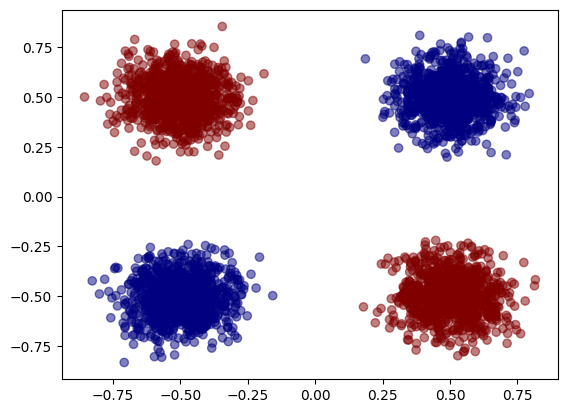

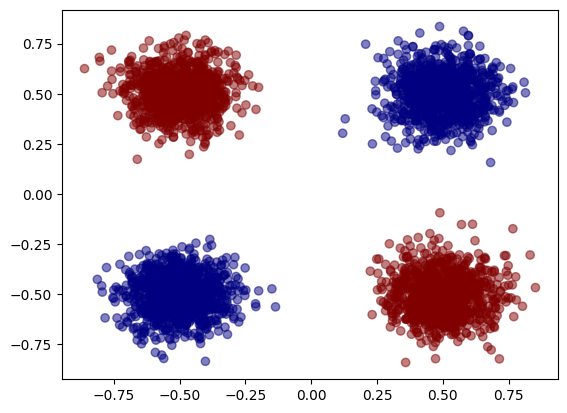

In [4]:
plt.scatter(train_data[:,0], train_data[:,1], c=train_label , alpha=0.5, cmap='jet')
plt.show()
plt.scatter(test_data[:,0], test_data[:,1], c=test_label , alpha=0.5, cmap='jet')
plt.show()

## Primeira tentativa: Rede neural com apenas um neurônio

In [5]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, activation=tf.nn.sigmoid, input_shape=[2])])
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

model.fit(train_data, train_label, epochs=50)

model.summary()

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4971 - loss: 0.2637
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5016 - loss: 0.2620
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5009 - loss: 0.2628
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5023 - loss: 0.2602
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5121 - loss: 0.2598
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5104 - loss: 0.2593
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5117 - loss: 0.2570
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5154 - loss: 0.2576
Epoch 9/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5105 - loss: 0.2576
Epoch 10/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5119 - loss: 0.2588
Epoch 11/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5289 - loss: 0.2553
Epoch 12/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5 (24.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## Dispersão da predição para o conjunto de teste

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


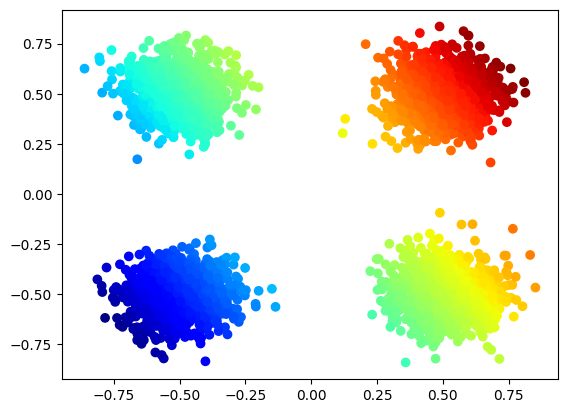

In [6]:
test_predict = model.predict(test_data)

plt.scatter(test_data[:,0], test_data[:,1], c=test_predict , cmap='jet')
plt.show()

## Superfície gerada pela rede (predição)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step


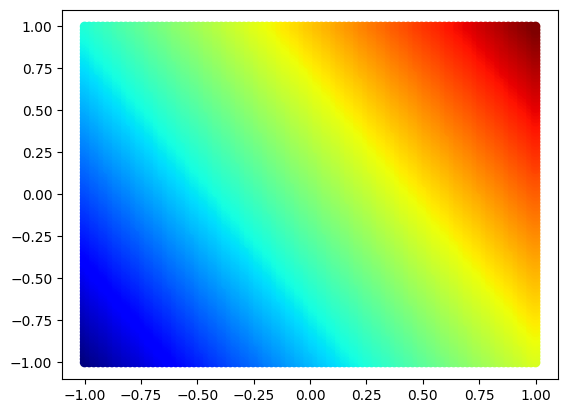

In [7]:
nx = 100
ny = 100
x = np.linspace(-1, 1, nx)
y = np.linspace(-1, 1, ny)
xv,yv = np.meshgrid(x, y, sparse=False, indexing='ij')
test_grid_x =  xv.flatten()
test_grid_y =  yv.flatten()

grid_list = np.append(test_grid_x, test_grid_y, axis=0)

test_grid = np.reshape(grid_list, (2, -1))

test_predict4 = model.predict(test_grid.T)

plt.scatter(test_grid[0,:], test_grid[1,:], c=test_predict4, cmap='jet')
plt.show()

## Adição de camada

In [8]:
model2 = tf.keras.Sequential([tf.keras.layers.Dense(16, activation=tf.nn.relu, input_shape=[2]),
                              tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)])
model2.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

#model2.fit(train_data, train_label, epochs=500)


history = model2.fit(train_data, train_label,
                    batch_size=20,
                    epochs=40,
                    verbose=1,
                    validation_data=(test_data, test_label))

model2.summary()

Epoch 1/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7327 - loss: 0.2520 - val_accuracy: 0.7483 - val_loss: 0.2407
Epoch 2/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7469 - loss: 0.2367 - val_accuracy: 0.7500 - val_loss: 0.2257
Epoch 3/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7492 - loss: 0.2226 - val_accuracy: 0.7500 - val_loss: 0.2140
Epoch 4/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7567 - loss: 0.2109 - val_accuracy: 0.7538 - val_loss: 0.2035
Epoch 5/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7861 - loss: 0.2008 - val_accuracy: 0.8913 - val_loss: 0.1937
Epoch 6/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9261 - loss: 0.1910 - val_accuracy: 0.9628 - val_loss: 0.1842
Epoch 7/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9757 - loss: 0.1820 - val_accuracy: 0.9868 - val_loss: 0.1748
Epoch 8/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9903 - loss: 0.1711 - val_accuracy: 0.

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67 (272.00 B)

 Trainable params: 65 (260.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## Evolução do treinamento

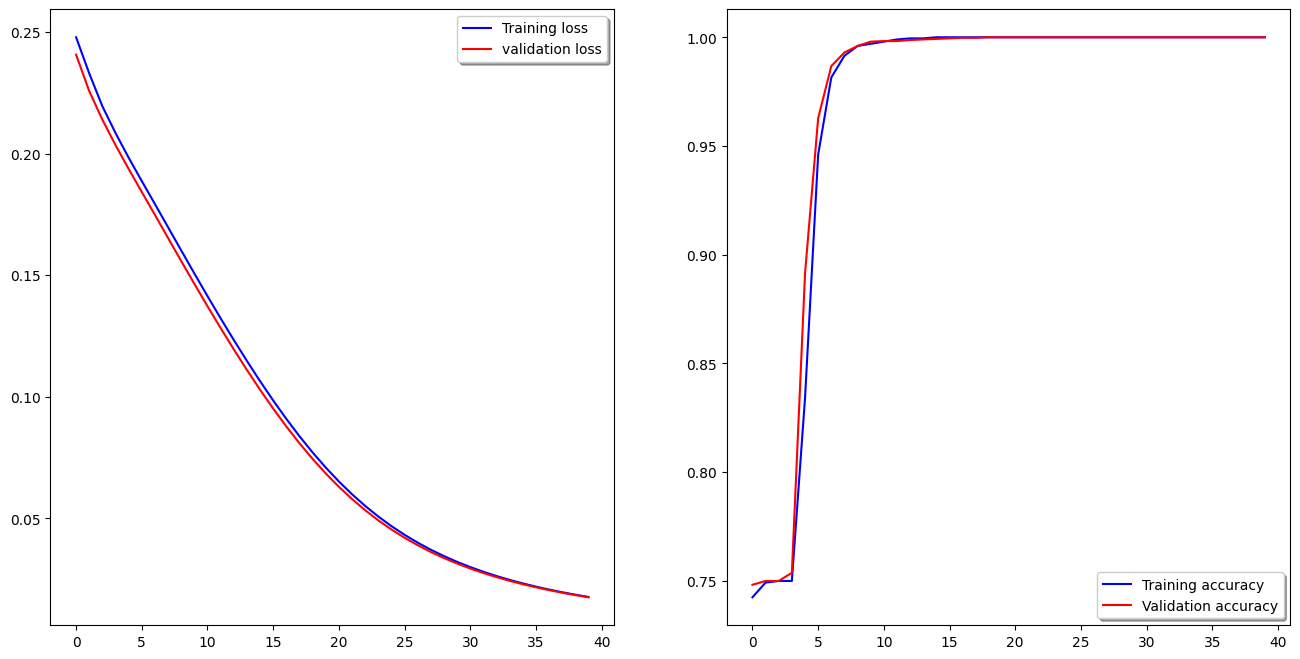

In [10]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)



## Dispersão do conjunto de teste (predição)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


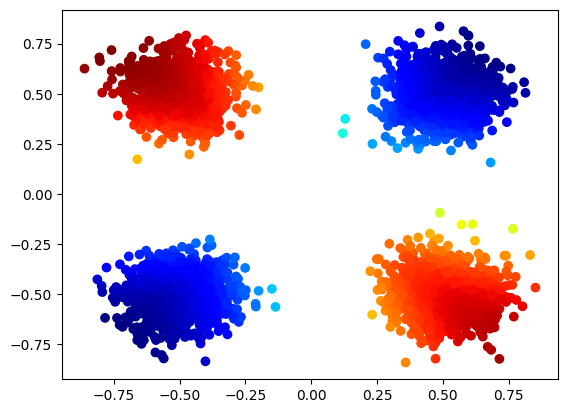

In [11]:

test_predict2 = model2.predict(test_data)

plt.scatter(test_data[:,0], test_data[:,1], c=test_predict2, cmap='jet')
plt.show()

## Superfície gerada pela rede (predição)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


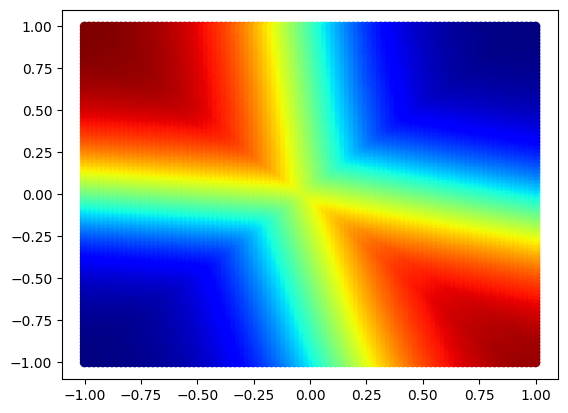

In [12]:
nx = 100
ny = 100
x = np.linspace(-1, 1, nx)
y = np.linspace(-1, 1, ny)
xv,yv = np.meshgrid(x, y, sparse=False, indexing='ij')
test_grid_x =  xv.flatten()
test_grid_y =  yv.flatten()

grid_list = np.append(test_grid_x, test_grid_y, axis=0)

test_grid = np.reshape(grid_list, (2, -1))

test_predict3 = model2.predict(test_grid.T)

plt.scatter(test_grid[0,:], test_grid[1,:], c=test_predict3, cmap='jet')
plt.show()
